In [1]:
import matplotlib.pyplot as plt
import matplotlib
import scipy.interpolate as intpol
from pylab import figure, text, scatter, show
import sys, math, numpy
%matplotlib inline

import seaborn as sns
sns.set_theme()

In [2]:
def load_bcig(sysname, pathname, npath):
    """load the bootstrapped bcig.npy"""
    basedir = '../../6.bcig_cvgtest/bcigs'
    return numpy.load(f"{basedir}/{sysname}.{pathname}.bootstrap_{npath}.npy")
load_bcig('toho_amp', 'r1ae', '180')

array([[ 2.10937228,  1.92330652,  2.25208638,  2.35743898,  2.87723364,
         2.36060575,  2.27374241,  2.29570005,  2.43461672,  2.13859193],
       [ 5.65812019,  6.26026605,  4.48238837,  5.58055382,  6.83909737,
         4.00466157,  7.17064371,  6.92410269,  6.3107358 ,  4.88169927],
       [ 5.90394756,  7.97804263,  6.71157738,  4.65004535,  7.79825075,
         6.77149611,  6.02527068,  5.58379169,  7.02696574,  5.52492383],
       [ 8.70681017,  7.95876124,  7.45150755,  5.8354101 ,  6.55208061,
         8.60554995,  7.00282194,  5.31892703,  8.647179  , 10.03320035],
       [ 8.12599079,  7.87017725,  7.44243615,  8.25175758,  7.55314219,
         7.34574744,  9.85286596,  8.64031794,  9.38896027, 10.07497712],
       [17.3057696 , 11.21613079, 14.04630423, 16.55699125, 15.33018333,
        17.01546102, 13.46764167, 16.5535983 , 13.64462619, 14.7540011 ]])

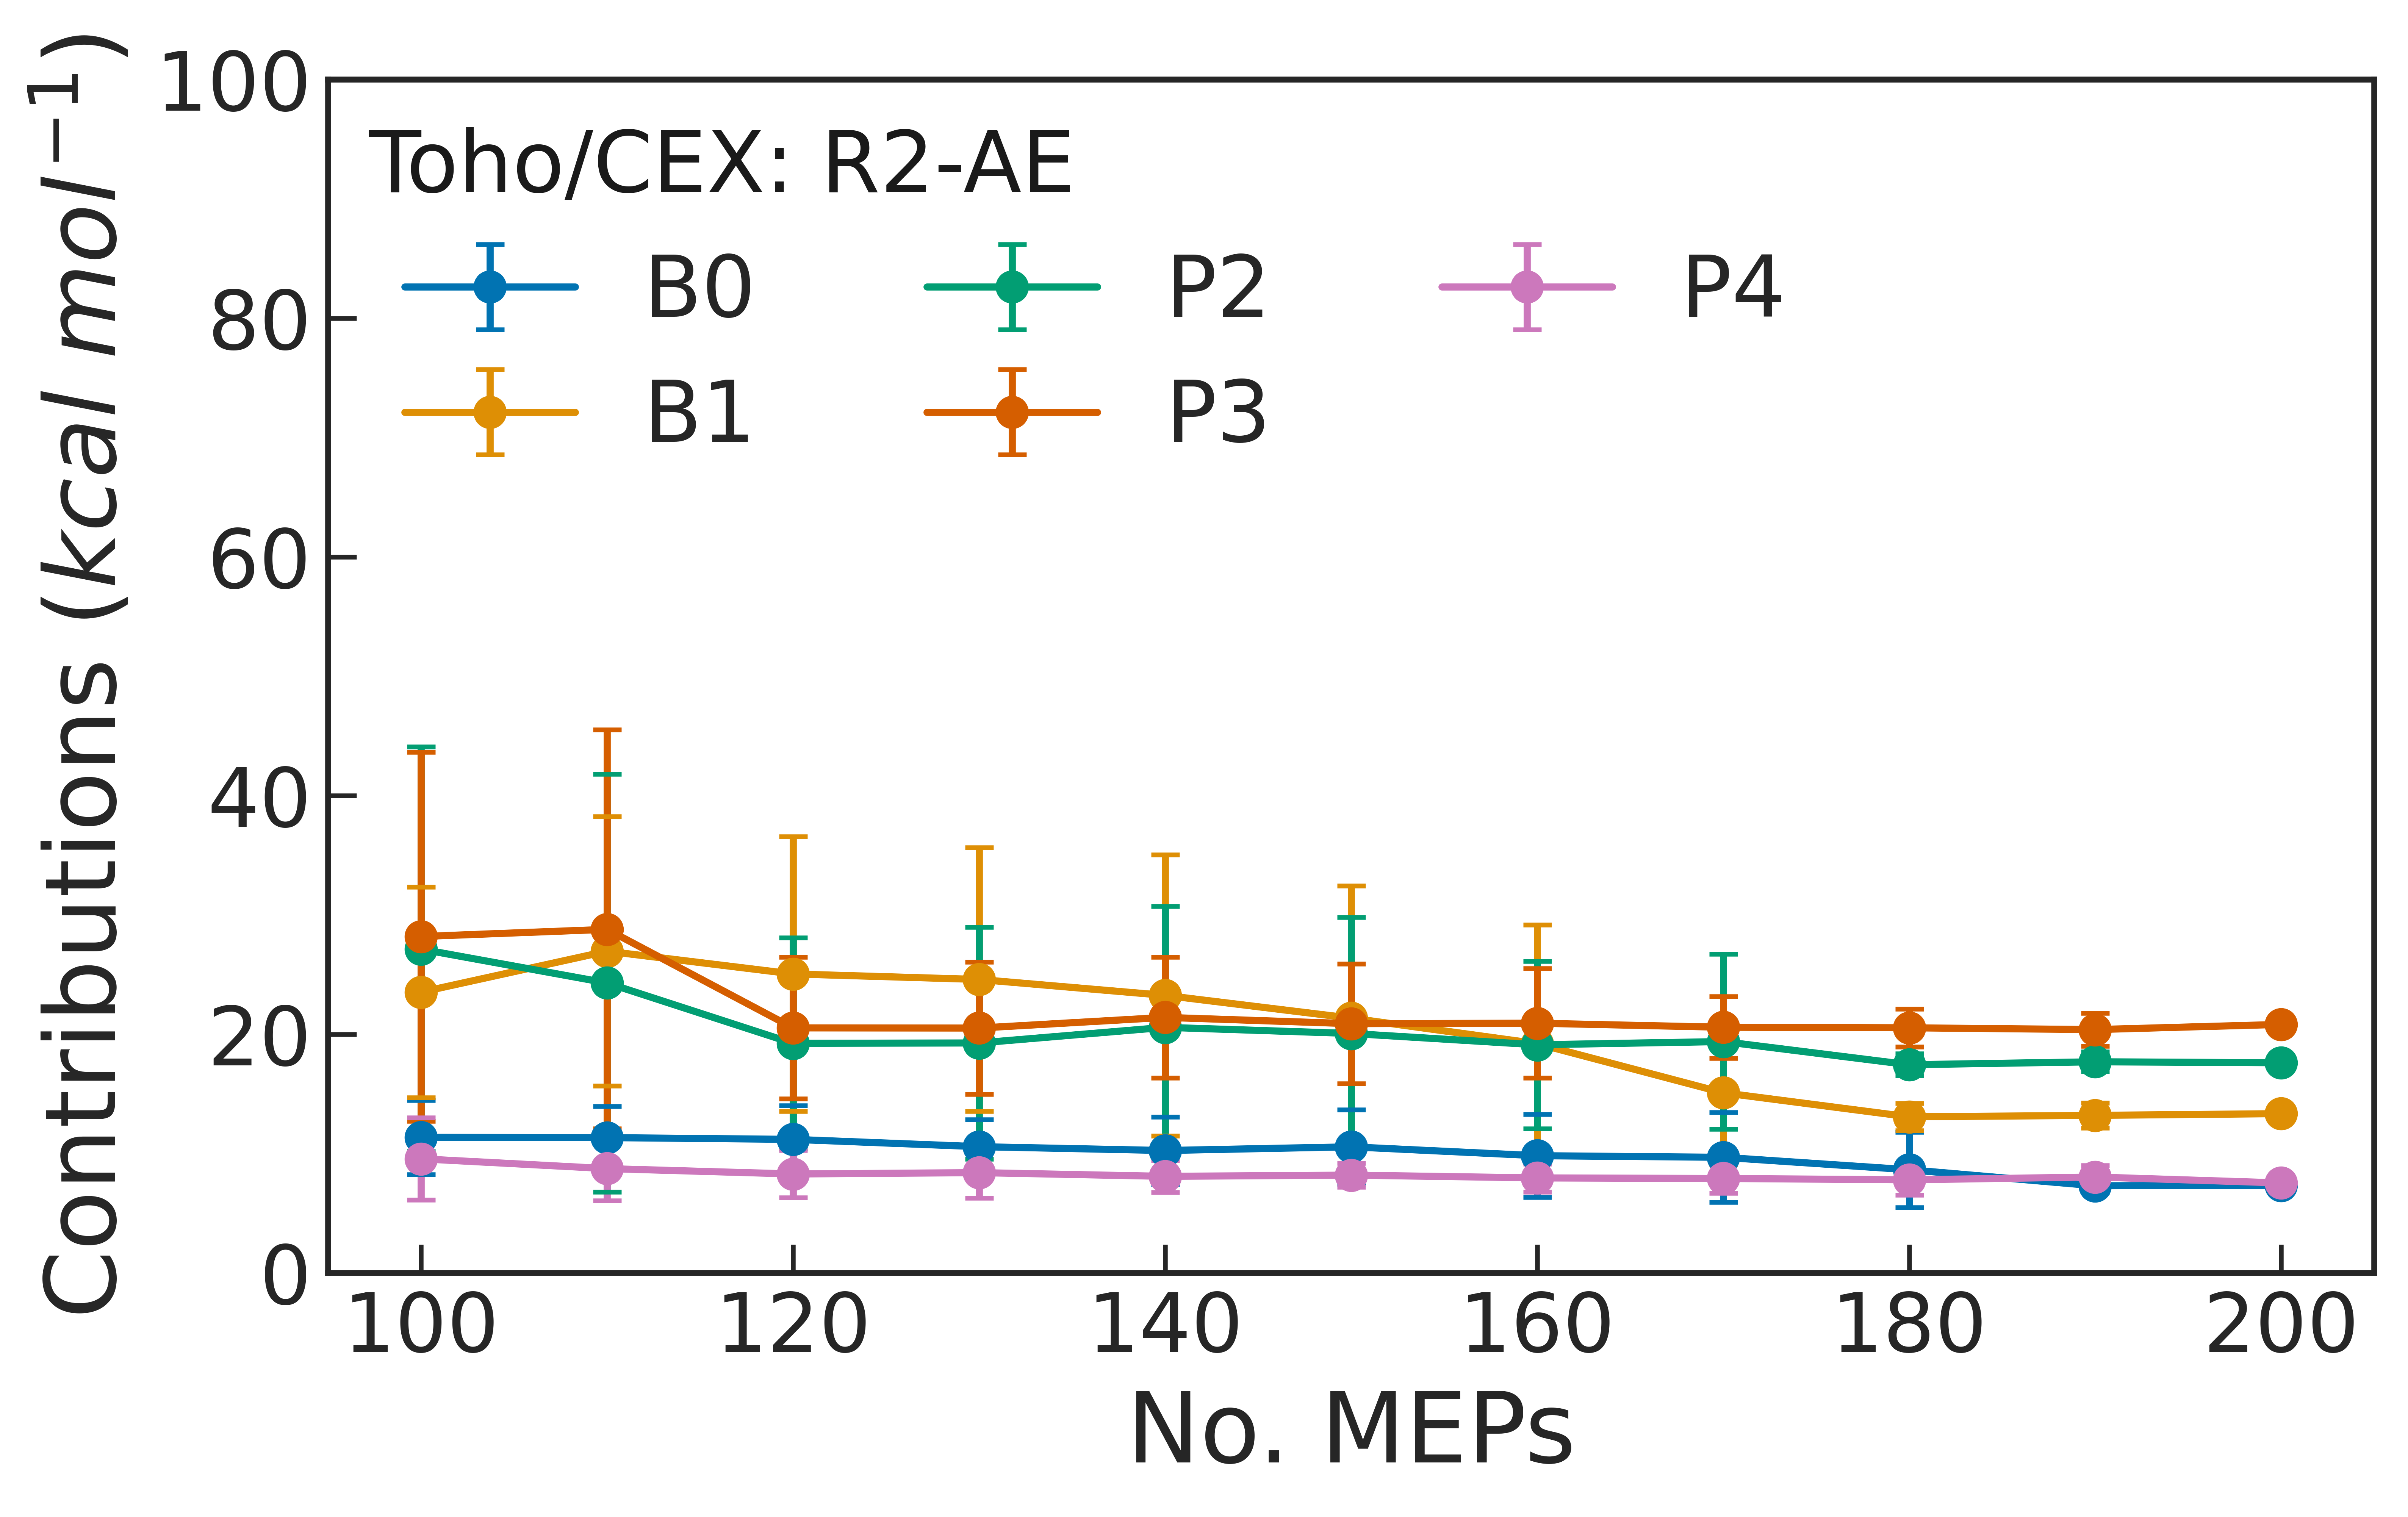

In [3]:
sns.set_style(style='white')
sns.set_style("ticks")

pathname = 'r2ae'
sysname  = 'toho_cex'
xticks = [str(int(10*i+100)) for i in range(0, 11)]

fg = ['B0', 'B1', 'P0', 'P1', 'P2', 'P3'] if pathname == 'r1ae' else ['B0', 'B1',             'P2', 'P3', 'P4']
nchem_fg = 6 if pathname == 'r1ae' else 5

# init figure ==================================================================
fig, ax,  = plt.subplots(figsize=(8, 5.5), dpi=900, facecolor='w', edgecolor='k')
plt.subplots_adjust(left=1.5/8, right=7.5/8, top=5/5.5, bottom=1.5/5.5)
ax.tick_params(which='major', direction='in', length=6, width=1, labelsize='x-large', )

ax.text(0.02, 0.96,'Toho/'+sysname[-3:].upper()+': '+pathname[:2].upper()+'-'+pathname[2:].upper(),
        ha='left', va='top', transform=ax.transAxes, fontsize=18, color='k')
    
ax.set_ylabel(r'Contributions'+r' $(kcal$ $mol^{-1})$', fontsize='xx-large', )
ax.set_xlabel('No. MEPs', fontsize='xx-large', )
    
ax.tick_params(labelsize='x-large')

ax.set_ylim(0, 100)
for fg_i in range(nchem_fg):
    contri = numpy.asarray([load_bcig(sysname, pathname, x)[fg_i] for x in xticks])

    plt.errorbar([int(10*i+100) for i in range(0, 11)], 
                 numpy.mean(contri, axis=1), 
                 yerr=numpy.std(contri, axis=1), 
                 capsize=3, marker='o', color=sns.color_palette('colorblind')[fg_i], label=f'{fg[fg_i]}')
    
    # x = numpy.arange(contri.shape[0])
    # boxes = ax.boxplot(x=contri.T, positions=x, widths=0.4, showcaps=False, showfliers=False, medianprops=dict(color='k'), patch_artist=True) 
    # plt.setp(boxes["boxes"], facecolor='#00000000')
    
    # for i in range(contri.shape[0]):
    #     ax.scatter(x=numpy.random.normal(loc=i, scale=0.04, size=10), marker='v',
    #                y=contri[i, :], color=sns.color_palette('colorblind')[1])
    # ax.scatter(x=[i for i in range(contri.shape[0])], y=numpy.std(contri, axis=1))

# legend 
legend = plt.legend(loc="upper left", bbox_to_anchor=(0., 0.92), ncol=3, prop={'size': 18}, frameon=False)

fig.savefig(f'{sysname}_{pathname}.cvgtest.png')
plt.show()